# Building a Deep Autoencoder - Lab

## Introduction

Deep auto encoders are characterized by having more than one layers in their encoder and decoder components. In this lab, we will mainly repeat the last experiment, but using a deep architecture instead of a simple feed forward styles networks for encoding and decoding the last lab. 

## Objectives

You will be able to:
- Build a deep autoencoder in Keras
- Create the encoder and decoder functions as multiple fully connected layers 
- Train an autoencoder with selected loss function and optimizer

## Deep Autoencoders

The extension of the simple Autoencoder is the __Deep Autoencoder__. The first layer of the Deep Autoencoder is used for first-order features in the raw input. The second layer is used for second-order features corresponding to patterns in the appearance of first-order features. This is also knows as FoF in deep learning i.e. Features of Features. Deeper layers of the Deep Autoencoder tend to learn even higher-order features.

A deep autoencoder is composed of two, symmetrical deep-belief networks

> __DBN (Deep belief Network)__ is a class of deep neural network which comprises of multiple layer of graphical model having both directed and undirected edges. It is composed of multiple layers of hidden units, where each layers are connected with each others but units are not. [Visist here](https://codeburst.io/deep-learning-deep-belief-network-fundamentals-d0dcfd80d7d4) for details. 



First four or five shallow layers representing the encoding half of the net.
The second set of four or five layers that make up the decoding half.

<img src="deep.png" width=600>

In our previous lab, we used single fully-connected layers for both the encoding and decoding models while building a simple AE. With deep AE, we can stack multiple fully-connected layers to make each of the encoder and decoder functions __deep__, turning our simple model into a deep architecture.

In this lab, we'll do just that: we'll repeat the initial problem setup, importing the same dataset and performing the same preprocessing. From there, we'll once again build an autoencoder, but this time, we will stack multiple layers in order to improve our performance.

## Import the code for reading + preprocessing  fashion-MNIST dataset 

In [1]:
# Load the fashion dataset
import numpy as np
import keras
from keras.datasets import fashion_mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras import regularizers

from IPython.display import Image
import matplotlib.pyplot as plt

# Load the training and test data sets (ignoring labels)
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize the train and test data to a range between 0 and 1.
x_train = x_train.astype('float32') / float(x_train.max())
x_test = x_test.astype('float32') / float(x_train.max())

# Reshape the training data to create 1D vectors
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

(x_train.shape, x_test.shape)

C:\Users\Brian\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


((60000, 784), (10000, 784))

## Build the Deep Autoencoder

So this time, we are building a deep autoencoder. The code for this wo't be much different to what we saw earlier. Here we are adding a few extra encoding and decoding layers as listed below:

- Use 3 fully-connected layers for the encoding model that inputs original 784 dimensions and decrease the dimensionality from 128 to 64 to 32. 

- Add 3 fully-connected decoder layers that reconstruct the image back to 784 dimensions.
- Except for the last layer, use ReLU activation functions in all other layers
- Show the model summary 



In [2]:
# Build a deep AE
input_dim = x_train.shape[1] # input dimension = 784
encoding_dim = 32

autoencoder = Sequential()

# Encoder Layers
autoencoder.add(Dense(4 * encoding_dim, input_shape=(input_dim,), activation='relu'))
autoencoder.add(Dense(2 * encoding_dim, activation='relu'))
autoencoder.add(Dense(encoding_dim, activation='relu'))

# Decoder Layers
autoencoder.add(Dense(2 * encoding_dim, activation='relu'))
autoencoder.add(Dense(4 * encoding_dim, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 784)               101136    
Total params: 222,384
Trainable params: 222,384
Non-trainable params: 0
_________________________________________________________________


## Extract the Encoder 

As seen previously, we will now extract the encoder model from the above. Remember the encoder model now consists of the first 3 layers in the autoencoder.

In [3]:
# Extract the Encoder model and output a summary like this:
input_img = Input(shape=(input_dim,))
encoder_layer1 = autoencoder.layers[0]
encoder_layer2 = autoencoder.layers[1]
encoder_layer3 = autoencoder.layers[2]
encoder = Model(input_img, encoder_layer3(encoder_layer2(encoder_layer1(input_img))))

encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


## Train the Model

We can now compile the model with Adam optimizer and binary cross entropy loss. Use 20 epochs and a batch size of 256. 

In [4]:
# Compile and train and the model 
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.3767 - val_loss: -1058.0883
Epoch 2/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.3111 - val_loss: -1112.2056
Epoch 3/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.3031 - val_loss: -1121.5422
Epoch 4/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.2984 - val_loss: -1129.5305
Epoch 5/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.2955 - val_loss: -1130.4070
Epoch 6/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.2926 - val_loss: -1133.9441
Epoch 7/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.2905 - val_loss: -1137.3434
Epoch 8/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.2888 - val_loss: -1138.1465
Epoch 9/20
60000/60000 [==============================] - 5s 79us/step - loss

## View the Code and Reconstruction

Bring in the code from previous experiment to view the reconstruction and encoding performed by our deep AE for 10 random images. 

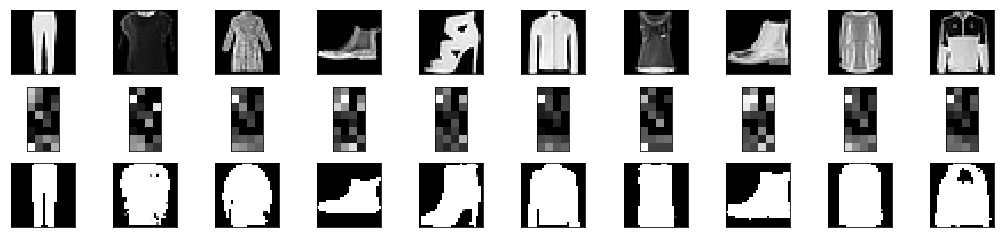

In [5]:
#Plot the original images, encoded representations and output
num_images = 10
np.random.seed(45)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

---

Do you notice any improvement over the previous model ? Let's admit it, there is not a huge change , due to the fact that we did not train the model to the point of convergence (for saving some time). Also, we did not use any cross validation techniques. We can improve these models by performing following tasks:


## Level Up - Optional 

- Train both (simple and deep) AEs to 100 epochs and compare the results
- Apply k-fold cross validation with deep AE (highly recommended for avoiding overfitting in deep networks) and check for any improvements.
- Repeat the simple and deep AE labs with MNIST dataset (available in Keras).
- Try this experiment with a high resolution (very high dimensionality) dataset. Caution: The training time may reach upto hours for a large dataset (or even days) - Thats where GPU/cloud computing comes into play. 

## Summary 

In this lab, we created a deep Autoencoder following the similar approach and dataset from our previous lab. We developed 3 layer encoder and decoder functions in keras and trained the network for 20 epochs. Next, we shall look into an AE architecture which is highly suitable for Image data - The Convolutional Auto-Encoder. 